[참고](https://github.com/rickiepark/handson-ml2/blob/master/09_unsupervised_learning.ipynb)

- 군집(clustering) <br/>
    : 비슷한 샘플을 **클러스터**(cluster)로 모음. 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용됨.
- 이상치 탐지(outlier detection) <br/>
    : '정상' 데이터가 어떻게 보이는지 학습하고 비정상 샘플을 감지하는 데 사용. 결함 제품을 감지하거나 새로운 트렌드를 찾는다.
- 밀도 추정(density estimation) <br/>
    : 데이터셋 생성 확률 과정(random process)의 **확률 밀도 함수**(probability density funtion, PDF)를 추정. <br/>
    밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높으므로 이상치 탐지에 사용되거나 데이터 분석과 시각화에 사용됨.

# 9.1 군집

- **군집**(clustering) : 비슷한 샘플을 구별해 하나의 **클러스터**(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업.

In [1]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

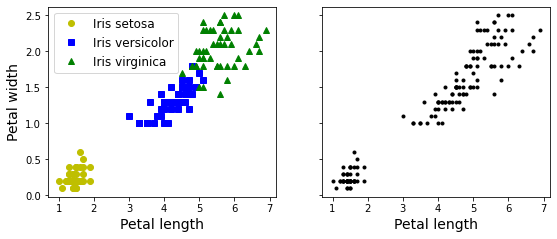

In [2]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(X[y==0, 2], X[y==0, 3], "yo", label="Iris setosa")
plt.plot(X[y==1, 2], X[y==1, 3], "bs", label="Iris versicolor")
plt.plot(X[y==2, 2], X[y==2, 3], "g^", label="Iris virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

plt.show()

분류(classification, 왼쪽)와 군집(clustering, 오른쪽) <br/>
이 자료는 이미 구분이 되어있어서 분류로도 잘 되지만, 안 되어있을 경우 군집을 이용. <br/>
오른쪽 그래프에서 좌측 하단에 따로 있는 cluster는 구분 가능하지만 우측 상단은 잘 구분하기가 어려워 보이는데, <br/>
이 경우 다른 특성들을 이용하면 분류할 수 있다.

군집의 이용
- 고객 분류 <br/>
    : 구매 이력이나 웹사이트 내 행동 등을 기반으로 고객을 클러스터로 모을 수 있음. 클러스터마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있음. <br/> 즉, **추천 시스템**(recommender system)을 만들 수 있다.
- 데이터 분석 <br/>
    : 새로운 데이터셋을 분석할 때 각 클러스터를 따로 분석하면 도움이 된다.
- 차원 축소 기법 <br/>
    : 각 클러스터에 대한 샘플의 **친화성**(affinity, 샘플이 클러스터에 얼마나 잘 맞는지)을 측정할 수 있다. 
- 이상치 탐지 <br/>
    : 모든 클러스터에 친화성이 낮은 샘플은 이상치일 가능성이 높다. 제조 분야에서 결함을 감지하거나 **부정 거래 감지**(fraud detection)에 활용됨.
- 준지도 학습 <br/>
    : 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파한다.
- 검색 엔진 <br/>
    : 데이터 베이스에 있는 이미지에 군집 알고리즘을 적용하여 사용자가 찾으려는 이미지의 클러스트를 찾아 반환한다.
- 이미지 분할 <br/>
    : 색을 기반으로 픽셀을 클러스터로 모아 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. <br/>
    이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 사용된다.

## 9.1.1 k-평균

In [3]:
#샘플 데이터셋
import numpy as np
from sklearn.datasets import make_blobs

blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [4]:
X, y = make_blobs(n_samples=2000, centers=blob_centers,
                  cluster_std=blob_std, random_state=7)

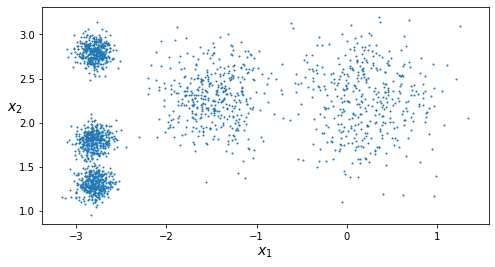

In [5]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)
    
plt.figure(figsize=(8, 4))
plot_clusters(X)
plt.show()

In [6]:
# 각 클러스터의 중심을 찾고 가장 가까운 클러스터에 샘플을 할당
from sklearn.cluster import KMeans
k = 5 # 알고리즘이 찾을 클러스터 갯수
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X)

군집에서의 **레이블**(label) : 알고리즘이 샘플에 할당한 클러스터의 인덱스(분류에서의 클래스 레이블과 다름).

??? `KMeans` 클래스의 인스턴스는 `labels_` 인스턴스 변수에 훈련된 샘플의 레이블을 가지고 있습니다. (p303)

In [7]:
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [10]:
y_pred is kmeans.labels_

True

In [11]:
# 센트로이드
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-2.79290307,  2.79641063],
       [-1.46679593,  2.28585348],
       [-2.80037642,  1.30082566]])

In [12]:
# 샘플에 가장 가까운 센트로이드의 클러스터를 할당
X_new = np.array([ [0,2], [3,2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [13]:
# 클러스터의 결정 경계를 그려 보로노이 다이어그램(Voronoi tessellation)을 얻을 수 있다.
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, 
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

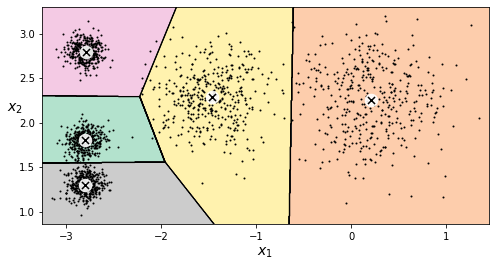

In [14]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

k-평균 알고리즘은 센트로이드까지의 거리를 고려하는 것이 전부이기 때문에 클러스터의 크기가 많이 다르면 잘 작동하지 않는다.
- 하드 군집(hard clustering) : 샘플을 하나의 클러스터에 할당하는 것.
- 소프트 군집(soft clustering) : 클러스터마다 샘플에 점수를 부여하는 것.

In [15]:
# 샘플과 각 센트로이드 사이의 거리
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 2.9042344 , 1.49439034, 2.88633901],
       [5.80730058, 2.80290755, 5.84739223, 4.4759332 , 5.84236351],
       [1.21475352, 3.29399768, 0.29040966, 1.69136631, 1.71086031],
       [0.72581411, 3.21806371, 0.36159148, 1.54808703, 1.21567622]])

### k-평균 알고리즘
센트로이드를 랜덤하게 선정한 뒤 샘플에 레이블을 할당하고 샌트로이드를 업데이트 하는 방식을 반복한다.

In [24]:
kmeans_iter1 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1) # 잘 안 됐으면 random_state를 바꿔서 다시 돌려보자....
kmeans_iter2 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=5, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

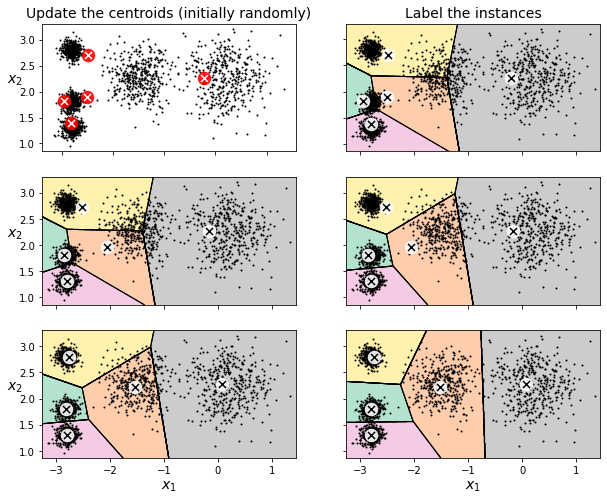

In [25]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

plt.show()

k-평균 알고리즘의 계산 복잡도는 일반적으로 샘플 갯수 $m$, 클러스터 갯수 $k$, 차원 갯수 $n$에 선형적이므로 가장 빠른 군집 알고리즘 중 하나이다.

### 센트로이드 초기화 방법


센트로이드의 위치를 알 수 있다면 `init` 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고 `n_init`을 1로 설정할 수 있다.

In [26]:
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters=5, init=good_init, n_init=1, random_state=42)

다른 방법으로 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고 가장 좋은 솔루션을 선택하는 것. <br/>
랜덤 초기화 횟수는 `n_init` 매겨변수로 조절. 기본값은 10(fit() 매서드 호출 전에 알고리즘이 10번 실행된다는 뜻). <br/>
최선의 솔루션을 아는 방법은 이너셔가 가장 낮은 모델을 찾는 것. 
- **이너셔**(inertia) : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리

In [29]:
# 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환
kmeans.fit(X)
kmeans.inertia_

211.59853725816828

In [30]:
kmeans.score(X)

-211.5985372581683

사이킷런의 '큰 값이 좋은 것이다'라는 규칙 때문에 음수로 만들어 가장 큰 값을 찾도록 함. (그렇게 하면 가장 작은 이너셔가 골라질 것임.)

k-평균++ 초기화 알고리즘 ???
1. 데이터셋에서 무작위로 균등하게 하나의 센트로이드 $ \bf{c}^{(1)}$을 선택.
2. $D \left( \bf{\text{x}} ^{(i)} \right) ^2 / \sum_{j=1} ^m D \left( \bf{ \text{x}} ^{(j)} \right) ^2 $의 확률로 샘플 $\bf{\text{x}}^{(i)}$를 새로운 센트로이드 $ \bf{c}^{(i)}$로 선택. 여기서 $D \left( \bf{\text{x}}^{(i)} \right)$는 샘플과 이미 선택된 가장 가까운 센트로이드까지 거리.
3. $k$개의 센트로이드가 선택될 때까지 이전 단계를 반복. 

### k-평균 속도 개선과 미니배치 k-평균
